In [5]:
!pip install python-resize-image
!pip install kaggle-cli

    100% |████████████████████████████████| 61kB 4.5MB/s 
    100% |████████████████████████████████| 2.0MB 15.8MB/s 
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.6 which is incompatible.
google-colab 0.0.1a1 has requirement requests~=2.18.0, but you'll have requests 2.21.0 which is incompatible.
cufflinks 0.14.6 has requirement plotly>=3.0.0, but you'll have plotly 1.12.12 which is incompatible.
  Found existing installation: requests 2.18.4
    Uninstalling requests-2.18.4:
      Successfully uninstalled requests-2.18.4
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0
    100% |████████████████████████████████| 81kB 3.1MB/s 
    100% |████████████████████████████████| 5.3MB 6.0MB/s 
    100% |████████████████████████████████| 112kB 27.5MB/s 
    100% |████████████████████████████████| 92kB 24.6MB/s 
    100% |████████████████████████████████| 51kB 22.2MB/s 
  Running setup.py bdist_wheel f

In [51]:
!pip install --no-cache-dir -I pillow
!pip install Pillow==4.0.0
!pip install PIL
!pip install image

    100% |████████████████████████████████| 2.0MB 16.6MB/s 
    100% |████████████████████████████████| 5.6MB 7.5MB/s 
python-resize-image 1.1.18 has requirement Pillow>=5.1.0, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL


https://forums.fast.ai/t/attributeerror-module-pil-image-has-no-attribute-register-extensions/10689/5

In [0]:
import os
import re
import urllib
import urllib.request
import urllib.parse
from PIL import Image
from resizeimage import resizeimage

In [0]:
# !pip install Pillow
import PIL
from PIL import Image

In [15]:
!kg download -u eren42 -p 92kaggleLoL -c dogs-vs-cats

/usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py:37: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 37 of the file /usr/local/lib/python3.6/dist-packages/mechanicalsoup/browser.py. To get rid of this warning, pass the additional argument 'features="lxml"' to the BeautifulSoup constructor.

  response.content, **soup_config)
downloading https://www.kaggle.com/c/dogs-vs-cats/download/sampleSubmission.csv

sampleSubmission.csv already downloaded !
downloading https://www.kaggle.com/c/dogs-vs-cats/download/test1.zip

test1.zip already downloaded !
downloading https://www.kaggle.com/c/dogs-vs-cats/download/train.zip

train.zip already downloaded !


In [26]:
!mkdir dogsCats;cd dogCats;ls

mkdir: cannot create directory ‘dogsCats’: File exists
/bin/bash: line 0: cd: dogCats: No such file or directory
dogsCats  lol  sample_data  sampleSubmission.csv  test1.zip  train.zip


In [0]:
!mv test1.zip train.zip dogsCats/

In [41]:
!cd dogsCats; unzip train.zip

Archive:  train.zip
replace train/cat.0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [42]:
!cd dogsCats;rm -rf test1.zip train.zip;ls 

train


In [0]:
def resize_img(imgpath, target_size = 150):
    try:
#         print (imgpath)
        img = Image.open(imgpath)
#         print (img.size)
        new_img = img.resize((target_size,target_size))
        new_img.save(imgpath, "JPEG", optimize=True)
    except:
#         print (imgpath)
        error.append(imgpath)

In [0]:
# error = []
# imgLst = os.listdir('dogsCats/train')
# print(imgLst[0])
# resize_img('dogsCats/train/' + imgLst[0])
# print (error)

In [45]:
!ls dogsCats

train


In [0]:
error = []
imgs = []
path = 'dogsCats/'
for path, subdirs, files in os.walk(path):
    for name in files:
        imgs.append(os.path.join(path, name))

In [53]:
print (imgs[1])

dogsCats/train/cat.11188.jpg


In [54]:
for ind, img in enumerate(imgs):
    resize_img(img)
    if ind % 1000 == 0:
      print (ind)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
21000
22000
23000
24000


In [55]:
!find dogsCats/train -type f | wc -l

25000


In [56]:
print (len(error))

0


In [57]:
!ls dogsCats

train


In [0]:
for err in error:
  os.remove(err)

In [0]:
from skimage.io import imread, imsave
from skimage.transform import resize

In [0]:
error = []
for img in imgs:
    image = imread(img)
    res = resize(image, (224, 224), preserve_range=True, mode='reflect')
    if res.shape != (224, 224, 3):
        print (img)
        print (res.shape)
        error.append(img)

In [0]:
print (len(error), error)
for err in error:
  os.remove(err)

In [62]:
import tensorflow as tf
import keras as K

Using TensorFlow backend.


In [63]:
print (tf.__version__, K.__version__)

1.12.0 2.2.4


In [64]:
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras import backend as K
import cv2 as cv
%pylab inline

import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg

import tensorflow as tf
import pandas as pd
import numpy as np

import seaborn as sns
%matplotlib inline

from keras.models import Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

import keras
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import *
from keras.layers.advanced_activations import LeakyReLU
# import keras_utils

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['resize', 'imread', 'imsave']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [0]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [0]:
BATCH_SIZE = 64
INIT_LR = 5e-3 

In [68]:
!cd dogsCats/ ; ls

train


In [0]:
path = './dogsCats/train'
imgs = []

In [0]:
for path, subdirs, files in os.walk(path):
    for name in files:
        imgs.append(os.path.join(path, name))

In [78]:
print (imgs[:5])

['./dogsCats/train/dog.12253.jpg', './dogsCats/train/cat.11188.jpg', './dogsCats/train/dog.3033.jpg', './dogsCats/train/cat.9977.jpg', './dogsCats/train/cat.3425.jpg']


In [0]:
lbls = []
for img in imgs:
    if 'cat' in img:
        lbls.append(0)
    else:
        lbls.append(1)

In [80]:
print (len(imgs), len(lbls))

25000 25000


In [0]:
lbls = keras.utils.to_categorical(lbls, num_classes=2)

In [0]:
(X_train, X_test, y_train, y_test) = train_test_split(imgs,
                                                      lbls,
                                                      test_size=0.2,
                                                      random_state=42)

In [83]:
for ind in range(0,5):
    print (X_train[ind], y_train[ind])

./dogsCats/train/cat.1224.jpg [1. 0.]
./dogsCats/train/dog.8713.jpg [0. 1.]
./dogsCats/train/dog.8441.jpg [0. 1.]
./dogsCats/train/cat.4631.jpg [1. 0.]
./dogsCats/train/dog.11830.jpg [0. 1.]


In [0]:
from imgaug import augmenters as iaa

seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

In [0]:
import numpy as np
from skimage.io import imread, imsave
from skimage.transform import resize

class DataGenerator(keras.utils.Sequence):
    'Generates data for Keras'
    def __init__(self, list_IDs, labels, batch_size=32, dim=(150,150), n_channels=1,
                 n_classes=10, shuffle=True):
        'Initialization'
        self.dim = dim
        self.batch_size = batch_size
        self.labels = labels
        self.list_IDs = list_IDs
        self.n_channels = n_channels
        self.n_classes = n_classes
        self.shuffle = shuffle
        self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.list_IDs) / self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        
        # Generate data
        X, y = self.__data_generation(indexes)

        return X, y

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.list_IDs))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)
            
    def read_and_resize(self, filepath):
        img = imread(filepath)
#         img = preprocess_input(img)
        res = resize(img, self.dim, preserve_range=True, mode='reflect')
        return np.expand_dims(res, 0)
            
    def __data_generation(self, indexes):
        'Generates data containing batch_size samples' 
        X = [self.read_and_resize(self.list_IDs[i])
             for i in indexes]
        y = self.labels[indexes]
        X = np.vstack(X)
        return seq.augment_images(X), y

In [0]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

def resnet():
    base_model = ResNet50(weights='imagenet', include_top=False)

    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    x = Dropout(0.3)(x)
    x = Dense(512, activation='relu')(x)
    x = Dropout(0.3)(x)
    pred = Dense(2, activation='softmax')(x)
    model = Model(inputs=base_model.input, outputs=pred)
    return model

In [87]:
# from keras.metrics import top_k_categorical_accuracy
# with tf.device("/cpu:0"):
#     model = Model(inputs=base_model.input, outputs=pred)
K.clear_session()
model = resnet()

/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 9s 0us/step


In [0]:
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [0]:


tensorboard = keras.callbacks.TensorBoard(log_dir='./logs/resnet2', 
                                          histogram_freq=0, 
                                          batch_size=BATCH_SIZE, 
                                          write_graph=True, 
                                          write_grads=True, 
                                          write_images=True, 
                                          embeddings_freq=0,
                                          embeddings_layer_names=None, 
                                          embeddings_metadata=None) 

In [0]:
# train_gen = DataGenerator(X_train, y_train, batch_size = 32)
# val_gen = DataGenerator(X_test, y_test, batch_size = 32)
checkpoint = ModelCheckpoint('checkpoint.h5', monitor='val_loss', verbose=0, save_best_only=False, save_weights_only=False, mode='auto', period=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=2, min_lr=0.001)
earlyStopping = EarlyStopping(monitor='val_acc', min_delta=0.0001, patience=5, \
                          verbose=1, mode='auto')

In [0]:
params = {
            'dim': (224,224),
            'batch_size': 32,
            'n_classes': 2,
            'n_channels': 3,
            'shuffle': True
         }

train_gen = DataGenerator(X_train, y_train, **params)
val_gen = DataGenerator(X_test, y_test, **params)

In [0]:
def lr_scheduler(epoch):
    return INIT_LR * 0.9 ** epoch

# callback pour afficher la learning rate
class LrHistory(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs={}):
        print("Learning rate:", K.get_value(model.optimizer.lr))

In [0]:
for layer in model.layers:
    layer.trainable = True
    if isinstance(layer, keras.layers.BatchNormalization):
        layer.momentum = 0.8
    
for layer in model.layers[:-20]:
    layer.trainable = False

In [94]:
history = model.fit_generator(generator = train_gen,
                          validation_data = val_gen,
                          use_multiprocessing = True,
#                           callbacks=[tensorboard, keras.callbacks.LearningRateScheduler(lr_scheduler),
#                                      LrHistory(), earlyStopping],
                          callbacks=[tensorboard],
                          workers=3,
                          epochs = 1)

/usr/local/lib/python3.6/dist-packages/keras/engine/training.py:490: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


Epoch 1/1
625/625 [==============================] - 877s 1s/step - loss: 0.6075 - acc: 0.6903 - val_loss: 8.2367 - val_acc: 0.4862


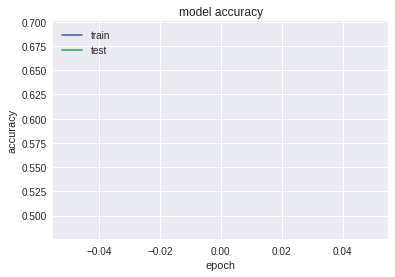

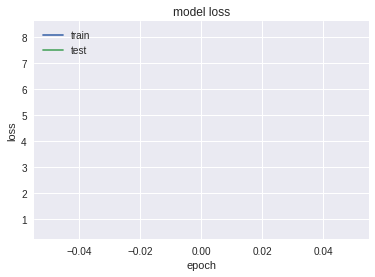

In [95]:
# historique pour l'accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# historique pour la loss function
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

<b>Objectif:</b>
- atteindre les 90% sans overfitting